In [1]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go#visualization
import plotly.offline as py#visualization
from dateutil import parser
import time
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Read the saved file
df = pd.read_csv("new_appdata.csv")

In [3]:
# Store it in another variable
X = df

In [4]:
X.head()

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,enrolled,liked,location,...,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount,verify_count,profile_count
0,235136,3,02:00:00,23,15,0,0,0,0,0,...,0,0,0,7,0,0,0,1,2,0
1,333588,6,01:00:00,24,13,0,0,0,0,1,...,0,0,0,5,0,0,0,1,3,0
2,254414,1,19:00:00,23,3,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,234192,4,16:00:00,28,40,0,0,1,0,1,...,0,0,0,6,0,3,0,1,2,0
4,51549,1,18:00:00,31,32,0,0,1,1,0,...,0,0,0,10,0,2,0,1,3,0


In [5]:
y=X['enrolled']
y

0        0
1        0
2        0
3        1
4        1
        ..
49995    1
49996    0
49997    0
49998    1
49999    0
Name: enrolled, Length: 50000, dtype: int64

In [6]:
X=X.drop(['enrolled'], axis='columns')
X

,user,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,...,TransactionList,NetworkFailure,ListPicker,other,SavingCount,CMCount,CCCount,LoansCount,verify_count,profile_count
0,235136,3,02:00:00,23,15,0,0,0,0,0,...,0,0,0,7,0,0,0,1,2,0
1,333588,6,01:00:00,24,13,0,0,0,1,1,...,0,0,0,5,0,0,0,1,3,0
2,254414,1,19:00:00,23,3,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,234192,4,16:00:00,28,40,0,0,0,1,0,...,0,0,0,6,0,3,0,1,2,0
4,51549,1,18:00:00,31,32,0,0,1,0,1,...,0,0,0,10,0,2,0,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,222774,3,13:00:00,32,13,0,0,0,0,0,...,0,0,0,6,0,2,0,0,1,0
49996,169179,1,00:00:00,35,4,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
49997,302367,2,22:00:00,39,25,0,0,0,1,0,...,0,0,0,6,0,0,0,0,3,0
49998,324905,6,12:00:00,27,26,0,0,0,1,0,...,0,0,0,13,0,0,0,0,4,0


In [7]:
X["hour"]=X.hour.str.slice(0,3).astype(int)

In [8]:


# Import the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)


Removing Identifiers

In [9]:
# Keep user ID for associating the user ID to its prediction (Save before you remove it)
train_ID =X_train['user']

In [10]:
# Drop it from the train set
X_train = X_train.drop(columns = 'user')

In [11]:
# Keep user ID for associating the user ID to its prediction from the test set
test_ID = X_test['user']

# Drop it from the test set

X_test = X_test.drop('user', axis=1)


Feature Scaling

In [12]:
# import standard scalar function 
from sklearn.preprocessing import StandardScaler

In [13]:
sc_X = StandardScaler() # returns numpy array but looses the column names and index

In [14]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values

In [15]:
# Convert the original into scaled set as all numerical features have been normalized
X_train_scaled = X_train2
X_test_scaled = X_test2

Model Building

In [16]:
# import the appropriate model we will use LogisticRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# when you have a large number of features in your dataset, some of the Regularization techniques used to 
#  address over-fitting and feature selection are L1 (Lasso) and L2 (Ridge)
# We use them to avoid over-fitting
model = LogisticRegression(random_state=0, penalty='l1',C=0.01,solver='liblinear')


In [18]:
# Fitting the model to the training set
# screens can be correlated to each other and we created the funnel features 
# other correlations may exist between screens. l2 regularization penalizes any particular field as penalty
# that is strongly correlated to the response variable
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.01, penalty='l1', random_state=0, solver='liblinear')

In [19]:
# Predicting the test set
model.score(X_train_scaled, y_train)
model.score(X_test_scaled, y_test)
y_pred = model.predict(X_test_scaled)


In [20]:
# Evaluating the results and validate accuracy
# Buld the Confusion Matrix by importing the correct libraries
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay 
cm1=confusion_matrix(y_test, y_pred)
cm1

array([[3864, 1223],
       [1196, 3717]])

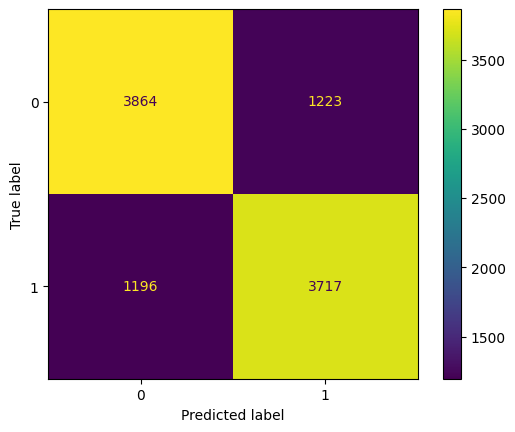

In [21]:
# Create a Comfusion matrix visually
disp=ConfusionMatrixDisplay(confusion_matrix=cm1,display_labels=model.classes_)
disp.plot()
plt.show()

In [22]:
# Print the accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score

print("Accuracy is {}".format(accuracy_score(y_test, y_pred))) 

print("Precision is {}".format(precision_score(y_test, y_pred)))

print("Recall is {}".format(recall_score(y_test, y_pred))) 

print("F1 score is {}".format(f1_score(y_test, y_pred)))
    

Accuracy is 0.7581
Precision is 0.7524291497975708
Recall is 0.7565642173824547
F1 score is 0.7544910179640718


In [23]:
print ("\nNumber of features used: {} out of {}".format(np.sum(model.coef_ != 0), X_train_scaled.shape[1]))


Number of features used: 23 out of 33


Feature: 0, Score: 0.02080
Feature: 2, Score: -0.13757
Feature: 3, Score: -0.08219
Feature: 4, Score: -0.01201
Feature: 5, Score: -0.07925
Feature: 8, Score: -0.07338
Feature: 9, Score: 0.00546
Feature: 10, Score: 0.18250
Feature: 13, Score: 0.00687
Feature: 14, Score: -0.24823
Feature: 17, Score: 0.03511
Feature: 18, Score: -0.05352
Feature: 19, Score: -0.07810
Feature: 20, Score: -0.06274
Feature: 22, Score: -0.05913
Feature: 23, Score: -0.04636
Feature: 25, Score: -0.01633
Feature: 26, Score: 0.73606
Feature: 28, Score: 0.76163
Feature: 29, Score: 0.00503
Feature: 30, Score: -0.48557
Feature: 31, Score: 0.51520
Feature: 32, Score: -0.12619


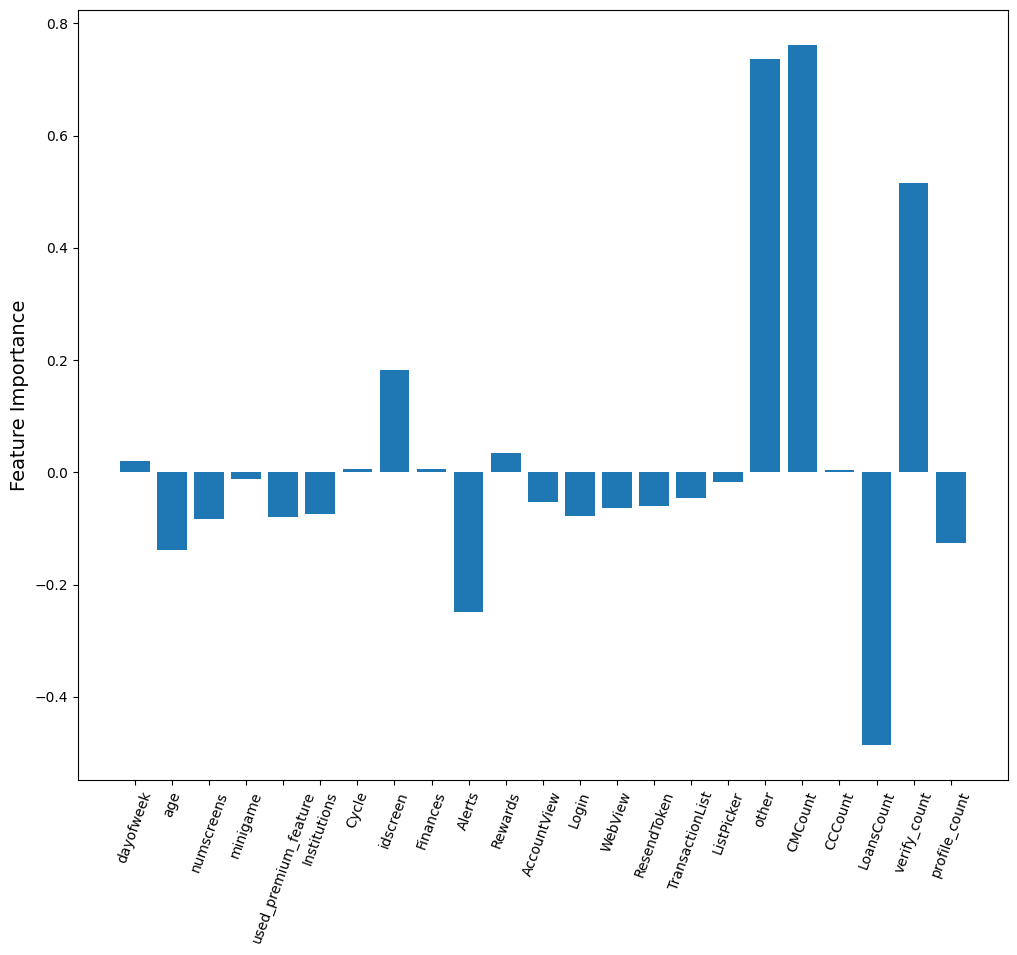

In [24]:
from sklearn.feature_selection import SelectFromModel
import matplotlib
import matplotlib.pyplot as plt
model1 = SelectFromModel(model, threshold=1e-5, prefit=True)
feature_idx = model1.get_support() 
feature_name = X_train_scaled.columns[feature_idx]
X_new = model1.transform(X_train_scaled)

# Plot
importance = model.coef_[0]
for i,v in enumerate(importance):
    if np.abs(v)>=1e-5:
        print('Feature: %0d, Score: %.5f' % (i,v))
sel = importance[np.abs(importance)>=1e-5]
# plot feature importance
plt.figure(figsize=(12, 10))
plt.bar([x for x in feature_name], sel)
plt.xticks(fontsize=10, rotation=70)
plt.ylabel('Feature Importance', fontsize = 14)
plt.show()


In [25]:
# K-fold Cross validation to different subsets of the training tests model works on every subset with 10 cv
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(model, X= X_train_scaled, y = y_train, cv = 10)
print(accuracies)

[0.76375 0.74975 0.76675 0.75275 0.7465  0.7525  0.75575 0.75275 0.7635
 0.751  ]


Q. Does the model hold true?
we used Cross validation of 10 in which whole data is segmented in 10 different subsets, by doing this whole dataset is used to train the model. seeing at the accuracies above of the 10 sets which are pretty close to each other we can safely say that the model hold true 

Model Conclusion

logistic regression model is used with L1 penalty - by which it consider only the features which are highly impacting the model and prediction. out of 33 total features, 23 features are identified which impact the model either positively or negatively. more the negative value means that an increase in this feature impacts the enrollment in a negative way and vice versa, same can be interpreted for positive value. the model have a high accuracy of about 75% , this remains around the same when 10 fold cross validation is also applied on the same. so a total of 23 features impact the model - 14 in a negative way (like Loans count, alerts etc.) and 9 in positive way (ids screen, Cmcount etc.)

In [26]:
# Formatting the final results
final_results = pd.concat([y_test, test_ID], axis =1).dropna()


In [27]:
final_results['predicted_results'] = y_pred


In [28]:
# Reorder the columns so the final results look like this
final_results=final_results.reindex(columns=['user','enrolled','predicted_results'])
print(final_results)

         user  enrolled  predicted_results
11841  239786         1                  1
19602  279644         1                  1
45519   98290         0                  0
25747  170150         1                  1
42642  237568         1                  0
...       ...       ...                ...
25091  143036         1                  0
27853   91158         1                  1
47278  248318         0                  0
37020  142418         1                  1
2217   279355         1                  0

[10000 rows x 3 columns]


Q. Provide recommendation to the marketing team based on the results. What has this model given us?

From the above feature importance graph, there are certain features where there is negative relation to enrollment means, users land on this page a lot but that don't turn into enrollment of the user on the app. There should be more interesting things that can be added on these pages for example people landing on the loans page can see affordable loan deals, Premium feature can be made more affordable so that more people turn towards enrollment to take advantage of the same.

on the positive side Rewards are something that can be provided more as it has a positive relation with outcome. better and useful rewards can attract more interest of the people. A lot of users have visited profile and token screens but not enrolled , so maybe the process for enrollment is either complex or too much work, so maybe deflecting the users - an improvement in ease of these can help in better usage of the app.  

also maybe the app needs a lot more focussed approach where less screens can cater multiple needs together which can help in more enrollment of the users. here it looks that user is going through too many screens and eventually losing interest in the app to enroll.

Imp: Team also did a L2 Penalty below just to check for the feature lists and weightage of each feature

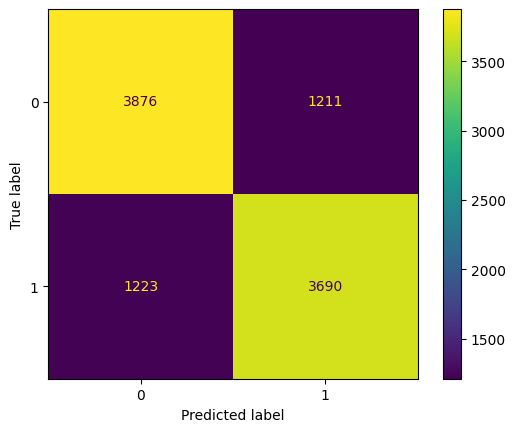

In [29]:
model_l2 = LogisticRegression(random_state=0, penalty='l2',C=0.01,solver='liblinear')
model_l2.fit(X_train_scaled, y_train)
model_l2.score(X_train_scaled, y_train)
model_l2.score(X_test_scaled, y_test)
y_pred_l2 = model_l2.predict(X_test_scaled)
cm2=confusion_matrix(y_test, y_pred_l2)
disp2=ConfusionMatrixDisplay(confusion_matrix=cm2,display_labels=model_l2.classes_)
disp2.plot()
plt.show()

In [30]:
print("Accuracy is {}".format(accuracy_score(y_test, y_pred_l2))) 

print("Precision is {}".format(precision_score(y_test, y_pred_l2)))

print("Recall is {}".format(recall_score(y_test, y_pred_l2))) 

print("F1 score is {}".format(f1_score(y_test, y_pred_l2)))

Accuracy is 0.7566
Precision is 0.7529075698836972
Recall is 0.7510685935273763
F1 score is 0.7519869574077849


In [31]:
print ("\nNumber of features used: {} out of {}".format(np.sum(model_l2.coef_ != 0), X_train_scaled.shape[1]))


Number of features used: 33 out of 33


Feature: 0, Score: 0.03474
Feature: 1, Score: -0.01342
Feature: 2, Score: -0.14631
Feature: 3, Score: -0.12026
Feature: 4, Score: -0.02693
Feature: 5, Score: -0.09448
Feature: 6, Score: 0.00983
Feature: 7, Score: -0.01600
Feature: 8, Score: -0.07964
Feature: 9, Score: 0.01794
Feature: 10, Score: 0.18673
Feature: 11, Score: 0.00716
Feature: 12, Score: 0.00440
Feature: 13, Score: 0.02361
Feature: 14, Score: -0.25258
Feature: 15, Score: -0.01018
Feature: 16, Score: 0.00092
Feature: 17, Score: 0.05059
Feature: 18, Score: -0.06317
Feature: 19, Score: -0.08841
Feature: 20, Score: -0.07338
Feature: 21, Score: -0.00315
Feature: 22, Score: -0.07243
Feature: 23, Score: -0.05853
Feature: 24, Score: -0.00708
Feature: 25, Score: -0.02977
Feature: 26, Score: 0.75503
Feature: 27, Score: 0.00317
Feature: 28, Score: 0.77875
Feature: 29, Score: 0.02932
Feature: 30, Score: -0.48968
Feature: 31, Score: 0.54833
Feature: 32, Score: -0.13514


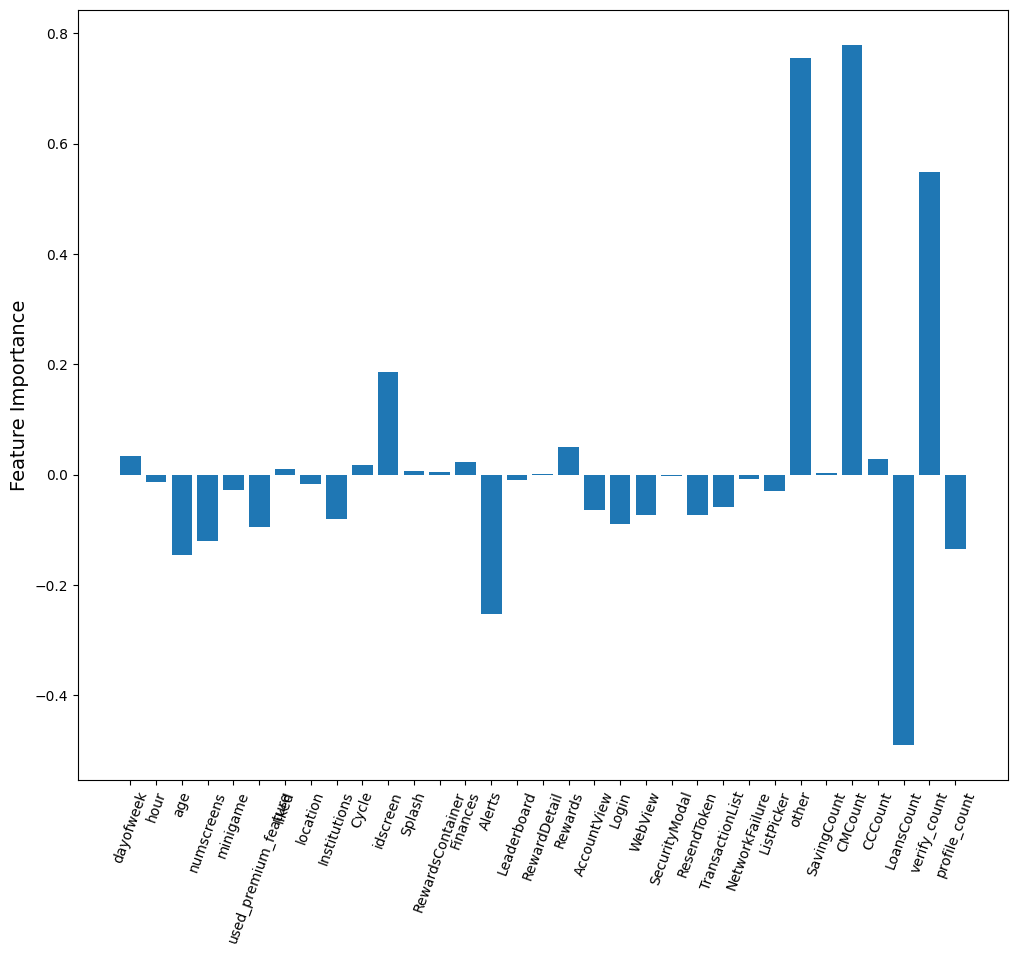

In [32]:
model2 = SelectFromModel(model_l2, threshold=1e-5, prefit=True)
feature_idx = model2.get_support() 
feature_name = X_train_scaled.columns[feature_idx]
X_new = model2.transform(X_train_scaled)

# Plot
importance = model_l2.coef_[0]
for i,v in enumerate(importance):
    if np.abs(v)>=1e-5:
        print('Feature: %0d, Score: %.5f' % (i,v))
sel = importance[np.abs(importance)>=1e-5]
# plot feature importance
plt.figure(figsize=(12, 10))
plt.bar([x for x in feature_name], sel)
plt.xticks(fontsize=10, rotation=70)
plt.ylabel('Feature Importance', fontsize = 14)
plt.show()

In [33]:
accuracies = cross_val_score(model_l2, X= X_train_scaled, y = y_train, cv = 10)
print(accuracies)

[0.764   0.74525 0.7695  0.753   0.74475 0.7525  0.75425 0.7525  0.7615
 0.749  ]


In [34]:
final_results1 = pd.concat([y_test, test_ID], axis =1).dropna()
final_results1['predicted_results'] = y_pred_l2
final_results1=final_results1.reindex(columns=['user','enrolled','predicted_results'])
print(final_results1)

         user  enrolled  predicted_results
11841  239786         1                  1
19602  279644         1                  1
45519   98290         0                  0
25747  170150         1                  1
42642  237568         1                  1
...       ...       ...                ...
25091  143036         1                  0
27853   91158         1                  1
47278  248318         0                  0
37020  142418         1                  1
2217   279355         1                  0

[10000 rows x 3 columns]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bf774db2-d69d-4c68-9d3d-54c7625b552d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>